In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter='random', max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [4]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

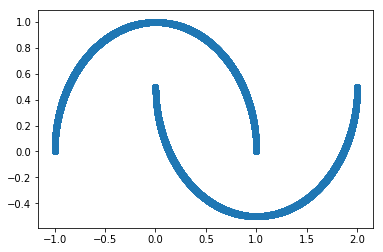

In [5]:
plt.scatter(X[:, 0], X[:, 1])

In [6]:
X = np.random.rand(100) * 2. - 1.
y = X**2 + np.random.rand(100) * 0.5

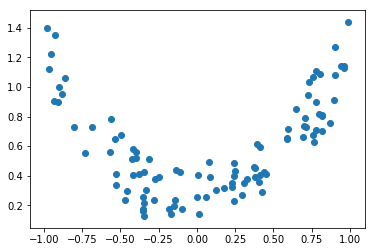

In [7]:
plt.scatter(X, y)

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = X.reshape(-1, 1)
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)
y1_pred = tree_reg1.predict(X)

In [9]:
y2 = y - y1_pred
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)
y2_pred = tree_reg2.predict(X)

In [10]:
y3 = y2 - y2_pred
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)
y3_pred = tree_reg3.predict(X)

In [11]:
y_pred = sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [12]:
mean_squared_error(y, y_pred)

0.01664716577834226

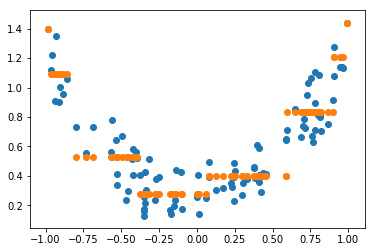

In [13]:
plt.scatter(X, y)
plt.scatter(X, y_pred)
plt.show()

In [14]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

/Users/espe/Documents/Projekte/ML/Environment/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

accuracy_score(y_test, rf_clf.predict(X_test))

0.9445

In [20]:
et_clf = ExtraTreesClassifier(random_state=42)
et_clf.fit(X_train, y_train)

accuracy_score(y_test, et_clf.predict(X_test))

0.9506428571428571

In [21]:
from sklearn.svm import LinearSVC
sv_clf = LinearSVC()
sv_clf.fit(X_train, y_train)

accuracy_score(y_test, sv_clf.predict(X_test))

0.8704285714285714

In [22]:
from sklearn.ensemble import VotingClassifier

vt_clf = VotingClassifier([('random-forest', rf_clf), ('extra-trees', et_clf), ('svm', sv_clf)])
vt_clf.fit(X_train, y_train)

accuracy_score(y_test, vt_clf.predict(X_test))

/Users/espe/Documents/Projekte/ML/Environment/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9479285714285715

In [23]:
rf_pred = rf_clf.predict(X_train)
et_pred = et_clf.predict(X_train)
vt_pred = vt_clf.predict(X_train)

/Users/espe/Documents/Projekte/ML/Environment/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [49]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier

class DecisionTreeBlenderClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, classifiers):
        self.classifiers = classifiers
        self.blender_ = DecisionTreeClassifier()
    
    def fit(self, X, y=None):
        X_preds = np.column_stack((clf.predict(X) for clf in self.classifiers))
        self.blender_.fit(X_preds, y)
        
    def predict(self, X, y=None):
        X_preds = np.column_stack((clf.predict(X) for clf in self.classifiers))
        return self.blender_.predict(X_preds)

In [50]:
blender_clf = DecisionTreeBlenderClassifier((rf_clf, et_clf, vt_clf))
blender_clf.fit(X_train, y_train)

/Users/espe/Documents/Projekte/ML/Environment/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [53]:
accuracy_score(y_test, blender_clf.predict(X_test))

/Users/espe/Documents/Projekte/ML/Environment/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9506428571428571